In [1]:
# Imports

import pandas as pd

In [2]:
# Read dataframe from csv file
file = "./data/processed_data/2013-2022_wo_lags.csv"
df= pd.read_csv(file)
# Filter for quote date between 2021-
# 01-01 and 2022-12-31
df_read = df[(df['Quote_date'] >= '2021-01-01') & (df['Quote_date'] <= '2022-12-31')]

<AxesSubplot: ylabel='Frequency'>

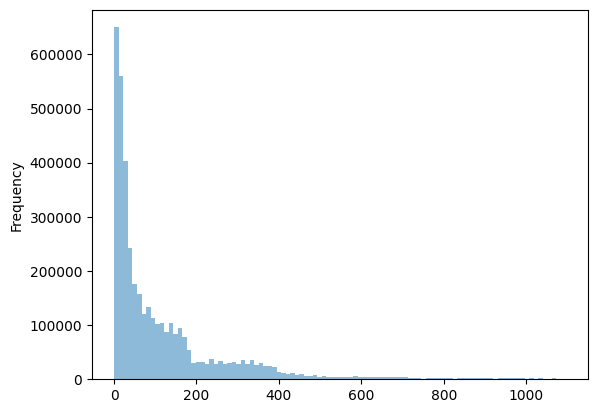

In [3]:
# Plot distribution of TTM
df_read['TTM'].plot.hist(bins=100, alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

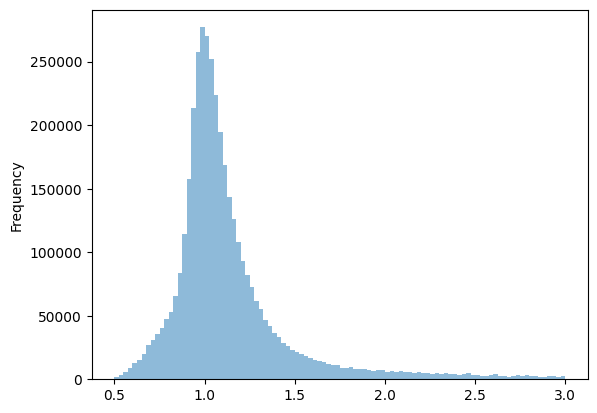

In [7]:
# Plot distribution of Moneyness between 0.5 and 5
(df_read['Underlying_last']/df_read["Strike"]).plot.hist(bins=100, alpha=0.5, range=(0.5, 3))

In [8]:
# Finding interval that defines one standard deviation of moneyness
(df_read['Underlying_last']/df_read["Strike"]).describe([.05, .95])

count    4.058483e+06
mean     1.285632e+00
std      1.455111e+00
min      3.887935e-01
5%       7.745489e-01
50%      1.053686e+00
95%      2.276553e+00
max      4.795570e+01
dtype: float64

<AxesSubplot: ylabel='Frequency'>

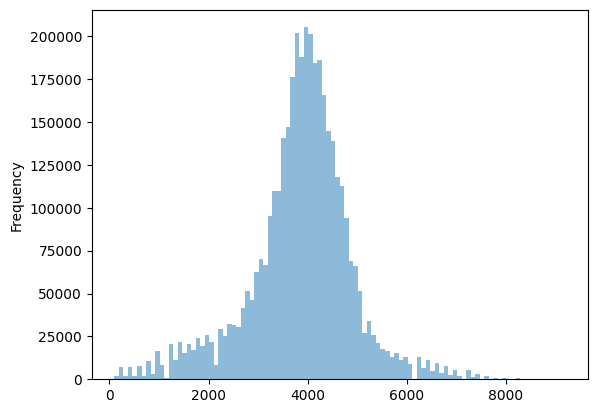

In [ ]:
# Plot distribution of strike price
df_read['Strike'].plot.hist(bins=100, alpha=0.5)